In [1]:
import numpy as np

In [2]:
%cd "ERA_wind"

c:\Users\17735\Desktop\CAIS++\Wind_downscaling\ERA_wind


C:\Users\17735\AppData\Roaming\Python\Python311\site-packages\IPython\core\magics\osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [3]:
t = np.load('ERA_wind.npz')

In [4]:
list(t.keys())

['lat', 'lon', 'level', 'time', 'rel_hum', 'temp', 'wind_u', 'wind_v']

In [5]:
print(len(t['lat']))
print(len(t['lon']))

121
201


In [6]:
print(t)

NpzFile 'ERA_wind.npz' with keys: lat, lon, level, time, rel_hum...


In [7]:
dir(t)

['_MAX_REPR_ARRAY_COUNT',
 '__abstractmethods__',
 '__class__',
 '__class_getitem__',
 '__contains__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_files',
 'allow_pickle',
 'close',
 'f',
 'fid',
 'files',
 'get',
 'items',
 'keys',
 'max_header_size',
 'pickle_kwargs',
 'values',
 'zip']

In [8]:
t.files

['lat', 'lon', 'level', 'time', 'rel_hum', 'temp', 'wind_u', 'wind_v']

In [9]:
for k in t.keys():
    print (k)
    print(t.get(k))

lat
[56.   55.75 55.5  55.25 55.   54.75 54.5  54.25 54.   53.75 53.5  53.25
 53.   52.75 52.5  52.25 52.   51.75 51.5  51.25 51.   50.75 50.5  50.25
 50.   49.75 49.5  49.25 49.   48.75 48.5  48.25 48.   47.75 47.5  47.25
 47.   46.75 46.5  46.25 46.   45.75 45.5  45.25 45.   44.75 44.5  44.25
 44.   43.75 43.5  43.25 43.   42.75 42.5  42.25 42.   41.75 41.5  41.25
 41.   40.75 40.5  40.25 40.   39.75 39.5  39.25 39.   38.75 38.5  38.25
 38.   37.75 37.5  37.25 37.   36.75 36.5  36.25 36.   35.75 35.5  35.25
 35.   34.75 34.5  34.25 34.   33.75 33.5  33.25 33.   32.75 32.5  32.25
 32.   31.75 31.5  31.25 31.   30.75 30.5  30.25 30.   29.75 29.5  29.25
 29.   28.75 28.5  28.25 28.   27.75 27.5  27.25 27.   26.75 26.5  26.25
 26.  ]
lon
[-60.   -59.75 -59.5  -59.25 -59.   -58.75 -58.5  -58.25 -58.   -57.75
 -57.5  -57.25 -57.   -56.75 -56.5  -56.25 -56.   -55.75 -55.5  -55.25
 -55.   -54.75 -54.5  -54.25 -54.   -53.75 -53.5  -53.25 -53.   -52.75
 -52.5  -52.25 -52.   -51.75 -51.5  -51.2

In [10]:
data = t
levels = data['level']

In [11]:
current_level = 250
level_index = np.where(levels == 250)[0]
print(level_index)

[2]


In [12]:
%pip install cartopy

In [13]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [14]:
projection = ccrs.PlateCarree()

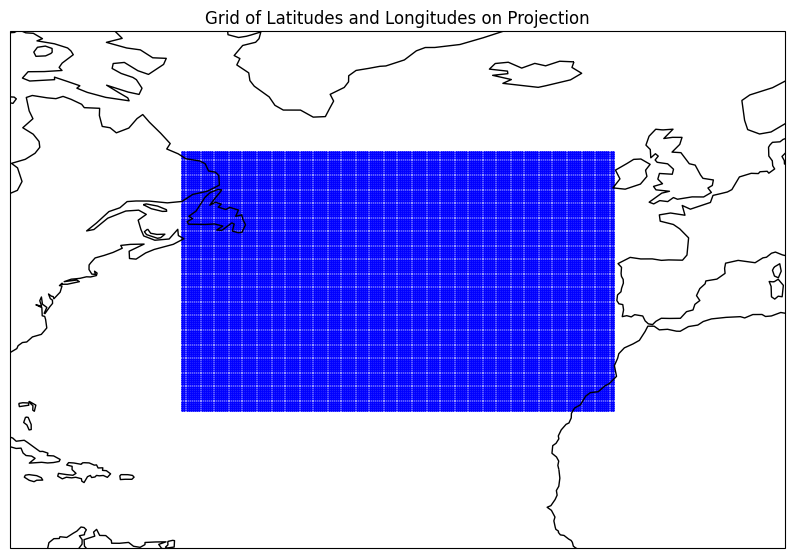

In [15]:
latitudes = data['lat']
longitudes = data['lon']

lon, lat = np.meshgrid(longitudes, latitudes)

plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

plt.scatter(lon, lat, s=1, c='blue', transform=ccrs.PlateCarree())

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Grid of Latitudes and Longitudes on Projection')

ax.set_extent([-80, 10, 10, 70], crs=ccrs.PlateCarree())

plt.show()

In [17]:
print("Number of longitude points", data['lon'].shape)
print("Number of latitude points", data['lat'].shape)
print("Number of pressure levels", data['level'].shape)
print("Number of time points", data['time'].shape)

print("Example in temperature shape", data['temp'].shape)
print("Example in wind speed shape", data['wind_u'].shape)

Number of longitude points (201,)
Number of latitude points (121,)
Number of pressure levels (4,)
Number of time points (744,)
Example in temperature shape (744, 4, 121, 201)
Example in wind speed shape (744, 4, 121, 201)


Each feature is in a matrix of dimension 744 x 4 x 121 x 201

time x pressure x latitude x longitude

In [18]:
# sample grid point over land in Canada

land_lat = 48.5
land_lon = -56

In [19]:
lat_index = np.where(data['lat'] == 48.5)[0]
print("lat index", lat_index)

lon_index = np.where(data['lon'] == -56)[0]
print("lon index", lon_index)

lat index [30]
lon index [16]


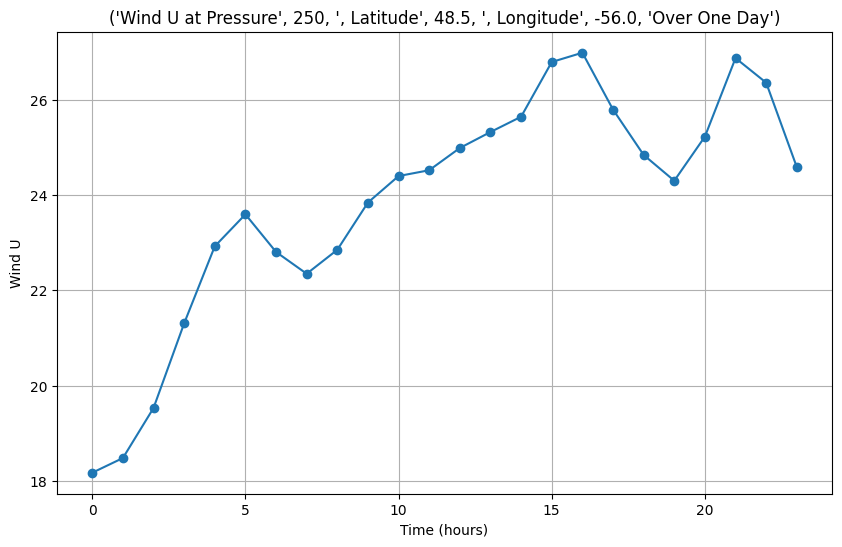

In [20]:
wind_u_subset = data['wind_u'][:24, level_index, lat_index, lon_index]

time = np.arange(24)

plt.figure(figsize=(10, 6))
plt.plot(time, wind_u_subset, marker='o', linestyle='-')
plt.xlabel('Time (hours)')
plt.ylabel('Wind U')
title = 'Wind U at Pressure',  data['level'][level_index][0], ', Latitude', data['lat'][lat_index][0], ', Longitude',  data['lon'][lon_index][0], 'Over One Day'
plt.title(title)
plt.grid(True)
plt.show()

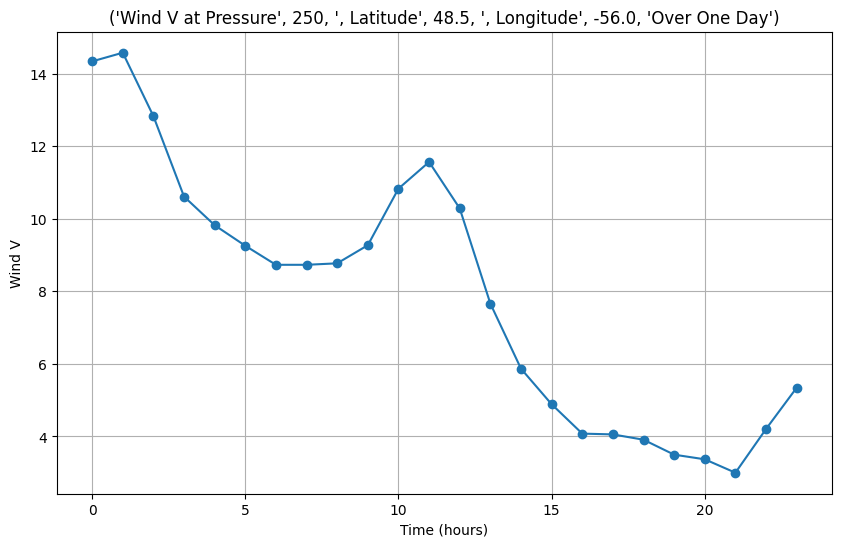

In [21]:
wind_v_subset = data['wind_v'][:24, level_index, lat_index, lon_index]

time = np.arange(24)

plt.figure(figsize=(10, 6))
plt.plot(time, wind_v_subset, marker='o', linestyle='-')
plt.xlabel('Time (hours)')
plt.ylabel('Wind V')
title = 'Wind V at Pressure', data['level'][level_index][0], ', Latitude', data['lat'][lat_index][0], ', Longitude',  data['lon'][lon_index][0], 'Over One Day'
plt.title(title)
plt.grid(True)
plt.show()

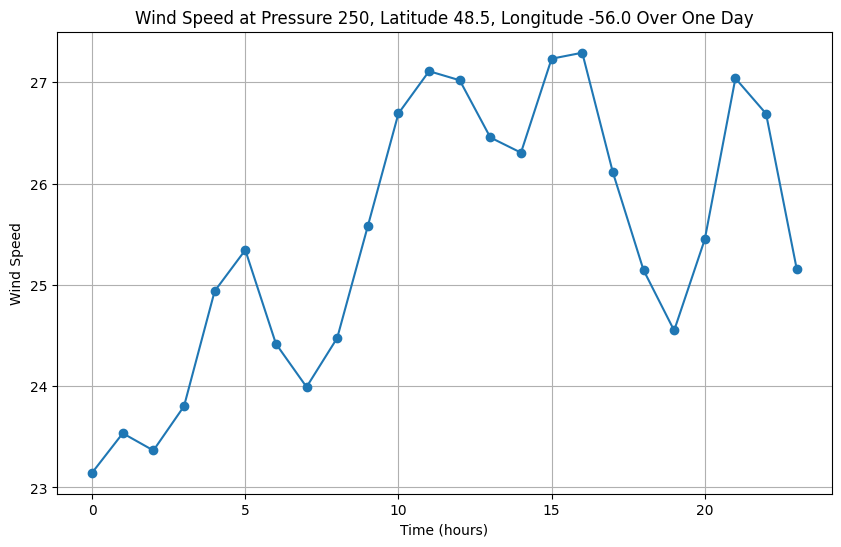

In [22]:
# find scalar component of wind and add to data

wind_speed = np.sqrt(wind_u_subset**2 + wind_v_subset**2)

time = np.arange(24)

plt.figure(figsize=(10, 6))
plt.plot(time, wind_speed, marker='o', linestyle='-')
plt.xlabel('Time (hours)')
plt.ylabel('Wind Speed')
title = 'Wind Speed at Pressure ' + str(data['level'][level_index][0]) + ', Latitude ' + str(data['lat'][lat_index][0]) + ', Longitude ' + str(data['lon'][lon_index][0]) + ' Over One Day'
plt.title(title)
plt.grid(True)
plt.show()

In [25]:
# wind speed for entire dataset

wind_speeds = np.sqrt(data['wind_u']**2 + data['wind_v']**2)
print(wind_speeds)
print(wind_speeds.shape)

[[[[27.32597499 27.45127131 27.60009181 ... 38.21439801 37.88176243
    37.54238001]
   [25.61684654 25.77122049 25.9516953  ... 39.38272252 38.99429035
    38.60077973]
   [23.93162485 24.07870514 24.24875579 ... 40.63773503 40.16912484
    39.69197365]
   ...
   [16.53155737 16.50567558 15.96039873 ... 12.20223668 12.18758344
    12.11238181]
   [16.41071244 16.3480998  15.61253787 ... 11.35305361 11.29410414
    11.17471847]
   [16.39952445 16.35085765 15.57445319 ... 10.38015086 10.33580772
    10.23320682]]

  [[30.0404944  29.99956735 29.94379571 ... 52.65031899 51.86958933
    51.05240642]
   [27.32693481 27.26358226 27.19797729 ... 55.04130801 54.33239813
    53.56311532]
   [24.60880569 24.49891044 24.4038771  ... 56.70319902 56.12181449
    55.45457803]
   ...
   [14.06862122 14.38040477 14.6676797  ... 12.3672033  12.44379722
    12.48504462]
   [13.90572343 14.27217398 14.47591547 ... 11.9338565  11.93075079
    11.91342143]
   [13.65115938 13.99602885 14.07181799 ... 11.32

In [24]:
# sample grid point over water on flight path

water_lat = 53
water_lon = -31

In [26]:
lat_index_w = np.where(data['lat'] == water_lat)[0]
print("lat index", lat_index)

lon_index_w = np.where(data['lon'] == water_lon)[0]
print("lon index", lon_index)

lat index [12]
lon index [116]


In [27]:
wind_u_subset = data['wind_u'][:24, level_index, lat_index_w, lon_index_w]
wind_v_subset = data['wind_v'][:24, level_index, lat_index_w, lon_index_w]

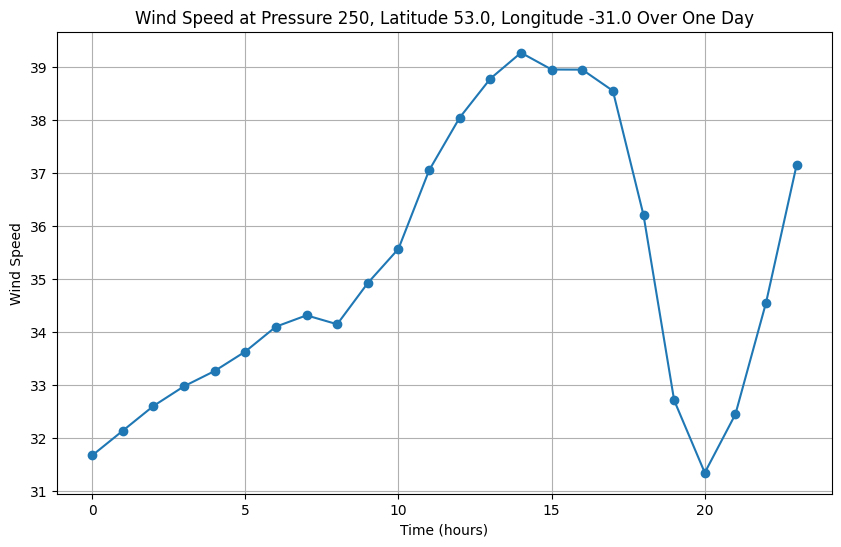

In [28]:
# find scalar component of wind and add to data

wind_speed = np.sqrt(wind_u_subset**2 + wind_v_subset**2)

time = np.arange(24)

plt.figure(figsize=(10, 6))
plt.plot(time, wind_speed, marker='o', linestyle='-')
plt.xlabel('Time (hours)')
plt.ylabel('Wind Speed')
title = 'Wind Speed at Pressure ' + str(data['level'][level_index][0]) + ', Latitude ' + str(data['lat'][lat_index_w][0]) + ', Longitude ' + str(data['lon'][lon_index_w][0]) + ' Over One Day'
plt.title(title)
plt.grid(True)
plt.show()

In [ ]:
# dictionary of arrays
# pick one "level" and move forward 
# gregorian date to calendar datetime
# splitting data into train, validation, and test
# temperature and wind speed 
# plot on a 2d map projection
    # final two dimensions of wind data will help for mapping 
# plot histograms (pick a few grid points) and visualize where the region actually is (box above the atlantic)
    # take a couple of points in the grid and compare over time
    # distributions of what the wind looks like (scalar wind) 
# zhang -- specific parameterization of wind speed 
# compare over water and over land
# differences when the sun rises and sets 

# range of wind speeds and how it changes over the area --> normalizing (outliers)
    # visualizing 
# daytime vs nighttime 
    # July 1 at 12:15AM at Greenwich time 

# cosine of the solar zenith angle 
# wind speeds more complex during the daytime 

# day vs. night
# water vs. land

